In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
from pathlib import Path
csvpath = Path('../Resources/amazon.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,3.080002
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999


<AxesSubplot:xlabel='Date'>

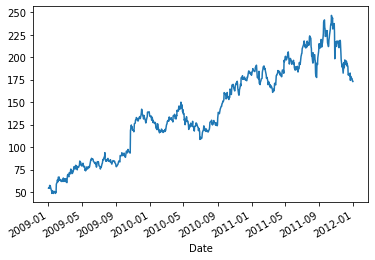

In [4]:
df.Close.plot()

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Close)

(-1.664891876360476,
 0.449285920626021,
 0,
 755,
 {'1%': -3.4390409569041207,
  '5%': -2.865375732701395,
  '10%': -2.568812543748081},
 3982.4046357133866)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [6]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df['Returns'] = df.Close.pct_change()

In [7]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

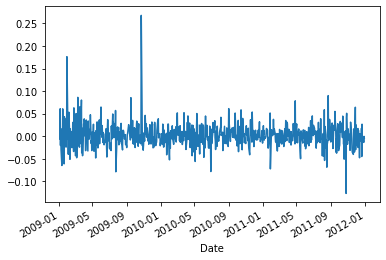

In [8]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

In [9]:
adfuller(df.Returns)

(-20.08131574989744,
 0.0,
 1,
 753,
 {'1%': -3.4390641198617864,
  '5%': -2.8653859408474482,
  '10%': -2.5688179819544312},
 -3315.190324462736)

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the closing prices using the `diff()` function
df['Diff'] = df.Close.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

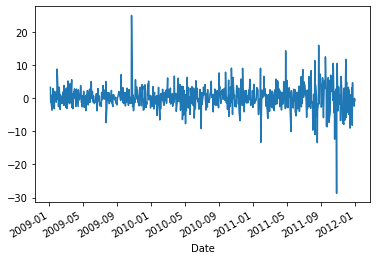

In [12]:
# Plot the 
df.Diff.plot()